# Enrichment analysis and visualisations

This is loosely adapted from one of the InterMineR vignettes
https://bioconductor.org/packages/release/bioc/vignettes/InterMineR/inst/doc/Enrichment_Analysis_and_Visualization.html

## Background

The InterMine gene set enrichment tool looks for annotations to a set of genes that occur more than would be expected by chance, given a background population of annotations. The hypergeometric distribution is used to calculate a P-value for each annotation and a choice of correction methods for multiple testing (Bonferonni, Holm-Bonferonni and Benjamini Hochberg) are available (Smith et al. 2012; Kalderimis et al. 2014).

InterMine provides Gene Ontology enrichment statistics as well as enrichment statistics for other annotation types including protein domains, pathways, human diseases, mammalian phenotypes and publications. The default background population is all genes in the genome with the specified annotation type. However, the background population can be changed by specifying another list. More information can be found in the [online documentation](http://intermine.readthedocs.io/en/latest/embedding/list-widgets/enrichment-widgets/).

## Goal for this exercise

1. Use InterMine's enrichment widgets on the HumanMine public list `PL_Pax6_Targets` to see if the list is enriched for any GO Terms.
2. Visualise the results using the GeneAnswers class. 

### Setup
Let's start by initialising InterMineR and choosing which InterMine we'll be running queries against:

In [2]:
#Begin by activating the InterMineR library:
library(InterMineR)

# get HumanMine instance
im <- initInterMine(listMines()["HumanMine"])

## Getting started with Enrichment

Performing enrichment analysis with InterMineR is preceded by two steps:

1. Get the enrichment widget name which indicates the annotation types that you want to investigate for enrichment (e.g. Gene Ontology Terms, protein domains, KEGG and Reactome Pathways, human diseases, mammalian phenotypes and publications).
2. Retrieve the list of bioentities of interest (Genes, Proteins, SNPs, etc.) for which the analysis will be performed.

In [3]:
# First, we'll retrieve the widgets available from HumanMine. This will tell us what typs of enrichment are available.

humanWidgets <- getWidgets(im)

# Print out the widgets so we can see what there is

humanWidgets


startClassDisplay,enrichIdentifier,name,description,enrich,startClass,title,targets,widgetType,chartType,filters,labels
primaryIdentifier,GWASResults.study.publication.pubMedId,snp_gwas_study_enrichment,GWAS studies enriched for SNPs in this list.,GWASResults.study.name,SNP,GWAS study Enrichment for SNPs,SNP,enrichment,NA,NA,NA
NA,NA,chromosome_distribution_for_snp,"Actual: number of items in this list found on each chromosome. Expected: given the total number of items on the chromosome and the number of items in this list, the number of items expected to be found on each chromosome.",NA,SNP,Chromosome Distribution,SNP,chart,ColumnChart,organism.name=[list],Chromosome & Count
primaryIdentifier,goAnnotation.ontologyTerm.parents.identifier,go_enrichment_for_gene,GO terms enriched for items in this list.,goAnnotation.ontologyTerm.parents.name,Gene,Gene Ontology Enrichment,Gene,enrichment,NA,"biological_process,cellular_component,molecular_function",NA
primaryIdentifier,publications.pubMedId,publication_enrichment,Publications enriched for genes in this list.,publications.title,Gene,Publication Enrichment,Gene,enrichment,NA,NA,NA
NA,NA,chromosome_distribution_for_gene,"Actual: number of items in this list found on each chromosome. Expected: given the total number of items on the chromosome and the number of items in this list, the number of items expected to be found on each chromosome.",NA,Gene,Chromosome Distribution,Gene,chart,ColumnChart,organism.name=[list],Chromosome & Count
primaryIdentifier,pathways.identifier,pathway_enrichment,Pathways enriched for genes in this list - data from KEGG and Reactome,pathways.name,Gene,Pathway Enrichment,Gene,enrichment,NA,"All,KEGG pathways data set,Reactome data set",NA
primaryIdentifier,GWASResults.study.publication.pubMedId,snp_publication_enrichment,Publications enriched for SNPs in this list.,GWASResults.study.publication.title,SNP,Publication Enrichment for SNPs,SNP,enrichment,NA,NA,NA
primaryIdentifier,proteins.proteinDomainRegions.proteinDomain.primaryIdentifier,prot_dom_enrichment_for_gene,Protein Domains enriched for items in this list.,proteins.proteinDomainRegions.proteinDomain.name,Gene,Protein Domain Enrichment,Gene,enrichment,NA,NA,NA
primaryIdentifier,proteinDomainRegions.proteinDomain.primaryIdentifier,prot_dom_enrichment_for_protein,Protein Domains enriched for items in this list.,proteinDomainRegions.proteinDomain.name,Protein,Protein Domain Enrichment,Protein,enrichment,NA,NA,NA
NA,NA,interactions,Genes (from the list or not) that interact with genes in this list. Counts may include the same interaction more than once if observed in multiple experiments.,NA,NA,Interactions,Gene,table,NA,NA,NA


Take a look through the widgets returned, especially the columns `targets` and `widgetType`. Since we plan to enrich the gene list `PL_Pax6_targets`, we're only interested in widgets that target `Gene`s. Similarly, we don't need to look at any widgets that aren't `enrichment` type widgets.

In [4]:
# We'll put the widget list in a data frame, so it's easy to filter.
humanWidgetsDataFrame <- as.data.frame(humanWidgets)

# Now let's ask the data frame to give us a subset of the widgets.
subset(humanWidgetsDataFrame, widgetType == 'enrichment' & targets == 'Gene')

,startClassDisplay,enrichIdentifier,name,description,enrich,startClass,title,targets,widgetType,chartType,filters,labels
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
3,primaryIdentifier,goAnnotation.ontologyTerm.parents.identifier,go_enrichment_for_gene,GO terms enriched for items in this list.,goAnnotation.ontologyTerm.parents.name,Gene,Gene Ontology Enrichment,Gene,enrichment,NA,"biological_process,cellular_component,molecular_function",NA
4,primaryIdentifier,publications.pubMedId,publication_enrichment,Publications enriched for genes in this list.,publications.title,Gene,Publication Enrichment,Gene,enrichment,NA,NA,NA
6,primaryIdentifier,pathways.identifier,pathway_enrichment,Pathways enriched for genes in this list - data from KEGG and Reactome,pathways.name,Gene,Pathway Enrichment,Gene,enrichment,NA,"All,KEGG pathways data set,Reactome data set",NA
8,primaryIdentifier,proteins.proteinDomainRegions.proteinDomain.primaryIdentifier,prot_dom_enrichment_for_gene,Protein Domains enriched for items in this list.,proteins.proteinDomainRegions.proteinDomain.name,Gene,Protein Domain Enrichment,Gene,enrichment,NA,NA,NA


#### Syntax Note: `=` vs `==`
##### Assignment operator: `=` or `<-`
In the code example above, we use the double equals sign `==`. This is because a single equals sign is used for *assignment*, e.g. `kittens = 5`, which would assign the value 5 to the variable `kittens`.  

In R we also use `<-` for assignment, so `kittens = 5` and `kittens <- 5` do (basically) the same thing.

##### Comparison operator: `==`
The double equals, however, is used for comparison - when we say `widgetType == 'enrichment'` we're saying that the code should compare all `widgetTypes`, and only give us ones that are equal to `enrichment`. 

### Perform enrichment analysis

Looking at the filtered list of widgets above, it looks like the widget we want to use to check for enriched GO Terms is named `go_enrichment_for_gene`. We'll use the `doEnrichment` method to get the enrichment results from HumanMine. 

In [5]:
# We're using the widget `go_enrichment_for_gene` against the list name `PL_Pax6_Targets`
#Syntax: 

# GO_enrichResult = doEnrichment(
#   im = YOUR_CHOSEN_INTERMINE_HERE
#   list = hsa_gene_entrez,
#   widget = "go_enrichment_for_gene"
#   organism = "Homo sapiens" # optional if results from more than one organism are retrieved
# )

GOEnrichmentResult = doEnrichment(
  im = im,
  genelist = "PL_Pax6_Targets",
  widget = "go_enrichment_for_gene"
)

# Print the results 
GOEnrichmentResult

identifier,description,pValue,count,populationAnnotationCount
<chr>,<chr>,<chr>,<chr>,<chr>
GO:0006357,regulation of transcription by RNA polymerase II,7.84204716471579E-45,156,2622
GO:0006366,transcription by RNA polymerase II,1.2080275813587092E-44,160,2760
GO:0003002,regionalization,9.407430648675467E-43,63,331
GO:0007389,pattern specification process,1.3681695743536852E-42,69,425
GO:0006355,"regulation of transcription, DNA-templated",6.722071853321776E-41,171,3410
GO:0006351,"transcription, DNA-templated",6.922292239691853E-41,175,3569
GO:0045944,positive regulation of transcription by RNA polymerase II,7.062534198955558E-41,103,1176
GO:0097659,nucleic acid-templated transcription,2.456929382402079E-40,175,3612
GO:1903506,regulation of nucleic acid-templated transcription,4.062836721344857E-40,171,3466


## Visualise it with Gene Answers 

    
For the visualisation, we'll need both the enrichment results and the list of genes we originally enriched - but the list is still on the server. Let's run a query to get the primaryIdentifiers for the genes in `PL_Pax6_Targets`. 

In [6]:
# We'll be using the setQuery method here
# 
# Syntax: 
# setQuery( 
#  select = c("VIEW.NAME1", "VIEW.NAME2", .... ),
#  where = setConstraints(
#    paths = c("CONSTRAINT.PATH.A", "CONSTRAINT.PATH.B"),
#    operators = c("CONSTRAINT.OPERATOR.A", "CONSTRAINT.OPERATOR.B"),
#    values = list("CONSTRAINT.VALUE.A","CONSTRAINT.VALUE.B")
#  )
#)
queryPax6Targets <- setQuery(
  # Choose which columns of data we'd like to see
  select = c("Gene.primaryIdentifier"),
  where = setConstraints(
      paths = c("Gene"),
      operators = c("IN"),
      values = list("PL_Pax6_Targets"))
)

Pax6Targets <- runQuery(im, queryPax6Targets)
Pax6Targets

Gene.primaryIdentifier
<chr>
10097
10196
1021
10257
10265
10320
1046
105
10586


### Format data for GeneAnswers

We'll be using [GeneAnswers](https://bioconductor.org/packages/release/bioc/html/GeneAnswers.html) to generate some visualisations of the data we've just fetched, so we'll need to convert our InterMine data into a shape that GeneAnswers can read. Luckily, there's a nice method for that in InterMineR: `convertToGeneAnswers`.

In [7]:
# load GeneAnswers package
library(GeneAnswers)

# convert InterMineR Gene Ontology Enrichment analysis results to GeneAnswers object
Pax6EnrichmentForGeneAnswers = convertToGeneAnswers(
  
  # Pass the enrichment results we ran earlier to GeneAnswers:
  enrichmentResult = GOEnrichmentResult,
  
  # Pass in our original list of gene IDs 
  geneInput = data.frame(GeneID = Pax6Targets, 
                         stringsAsFactors = FALSE),
  
  # in our example we use Gene.primaryIdentifier values
  geneInputType = "Gene.primaryIdentifier",
    
  # The type of enrichment widget we ran
  # in our example we use Gene Ontology (GO) terms:
  categoryType = "GO"  
)

Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: RCurl
Loading required package: bitops
Loading required package: annotate
Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:igraph’:

    normalize, path, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basena

We can use the summary(geneAnswersObjectHere) function to see
interesting info about our list + enrichment.... 

In [8]:
summary(Pax6EnrichmentForGeneAnswers)

This GeneAnswers instance was build from GO based on hyperG test.
Statistical information of 578 categories with p value less than 0.05 are reported. Other categories are considered as nonsignificant.
There are 578 categories related to the given 319 genes

Summary of GeneAnswers instance information:

Slot: geneInput
  Gene.primaryIdentifier
1                  10097
2                  10196
3                   1021
4                  10257
5                  10265
6                  10320
......

Slot: testType
[1] "hyperG"

Slot: pvalueT
[1] 0.05

Slot: genesInCategory
$`GO:0006357`
  [1] "10097"  "1021"   "10265"  "10320"  "1046"   "10660"  "11023"  "1112"  
  [9] "11166"  "116039" "117154" "153572" "1602"   "170302" "170825" "1745"  
 [17] "1746"   "1747"   "1749"   "1750"   "1761"   "2004"   "2018"   "2019"  
 [25] "2077"   "2104"   "2128"   "2138"   "221833" "23090"  "23414"  "23440" 
 [33] "2494"   "253738" "256297" "25925"  "26053"  "2625"   "26257"  "2637"  
 [41] "26468"  "26

The last thing we need to do before we can start creating visualisations is make the Gene Answers object we just created readable. 

In [9]:
#Pax6EnrichmentForGeneAnswers <- geneAnswersReadable(Pax6EnrichmentForGeneAnswers)

### It's time for some graphs

We'll start with a concept-gene network that shows which genes are associated with our given GO terms


Loading required package: org.Hs.eg.db



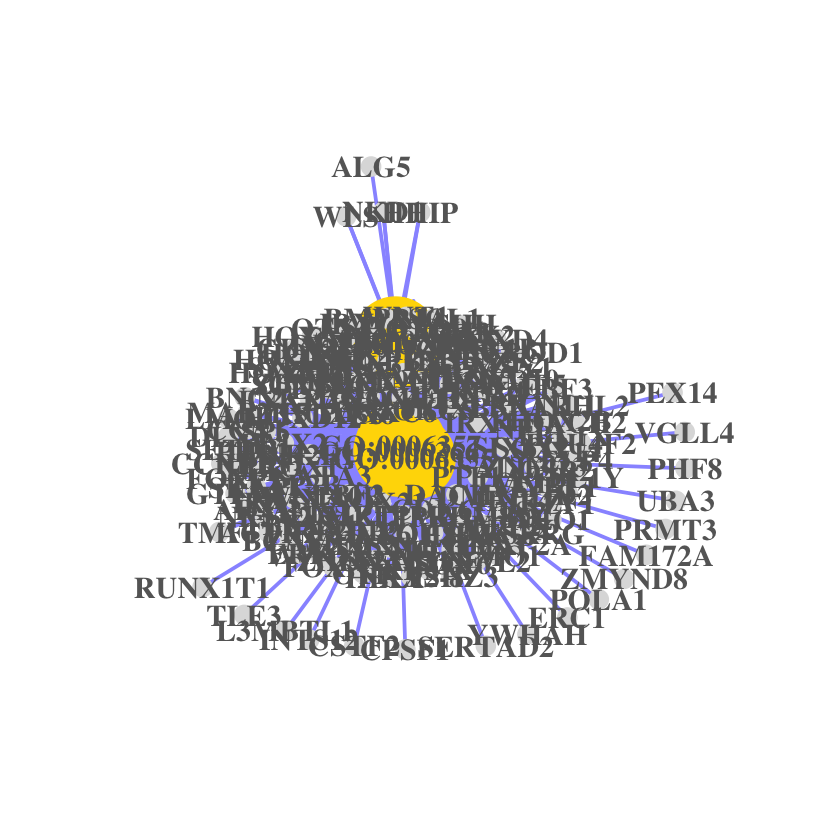

In [10]:
geneAnswersConceptNet(Pax6EnrichmentForGeneAnswers, 
                      colorValueColumn=NULL,
                      centroidSize='correctedPvalue', 
                      output='fixed',
                      geneSymbol = TRUE)

In [11]:
geneAnswersConceptRelation(Pax6EnrichmentForGeneAnswers,
                           directed=TRUE, 
                           netMode='connection',
                           catTerm=TRUE, 
                           catID=TRUE,
                           showCats = 1:2) # 1:2 means run this for go terms 1 until 2. 

[1] "Search Tree Merge without filterGraphIDs!"
[1] "Searching hubs ..."


Loading required package: GO.db



[1] "The Graph without any nodes removal is a connected one. Search 1 layer(s). Drawing network ..."
[1] "Building graph structure ..."
[1] "Removing NULL element ..."
[1] "Removing NA ..., including NA in names of the input list"
[1] "Converting to a matrix ..."
[1] "For the given directed graph, the node 2 might be the root."


In [ ]:
buildNet(getGeneInput(Pax6EnrichmentForGeneAnswers)[,1],
         idType='GeneInteraction', 
         layers=2,
         filterGraphIDs=getGeneInput(Pax6EnrichmentForGeneAnswers)[,1],
         filterLayer=2, 
         netMode='connection')

In [12]:
geneAnswersHeatmap(Pax6EnrichmentForGeneAnswers, 
                   catTerm=TRUE, 
                   geneSymbol=TRUE,
                   showCats = 5:10,
                   cex.axis = 0.75)

ERROR: Error in geneAnswersHeatmap(geneanswer_object, catTerm = TRUE, geneSymbol = TRUE, : object 'geneanswer_object' not found
